In [1]:
import os
os.environ["OPENAI_DEFAULT_MODEL"] = 'gpt-4o-mini'

In [2]:
!pip install yfinance matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.download(ticker, start="2024-05-01", end="2024-05-26")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-01,83.021355,85.979654,81.235774,85.056876,559863000
2024-05-02,85.796700,86.216598,83.180314,84.429019,377898000
2024-05-03,88.767998,89.259878,87.019411,87.768234,398341000
2024-05-06,92.118202,92.198185,89.033933,89.368853,376203000
2024-05-07,90.532578,91.759285,88.989943,91.076448,437342000


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-20,94.757576,95.177475,93.417897,93.727821,318764000
2024-05-21,95.363441,95.377438,93.157962,93.576862,328946000
2024-05-22,94.927544,95.997290,93.226949,95.436426,548648000
2024-05-23,103.774452,106.294852,101.495984,102.003867,835065000
2024-05-24,106.443817,106.449812,102.975636,104.424291,429494000


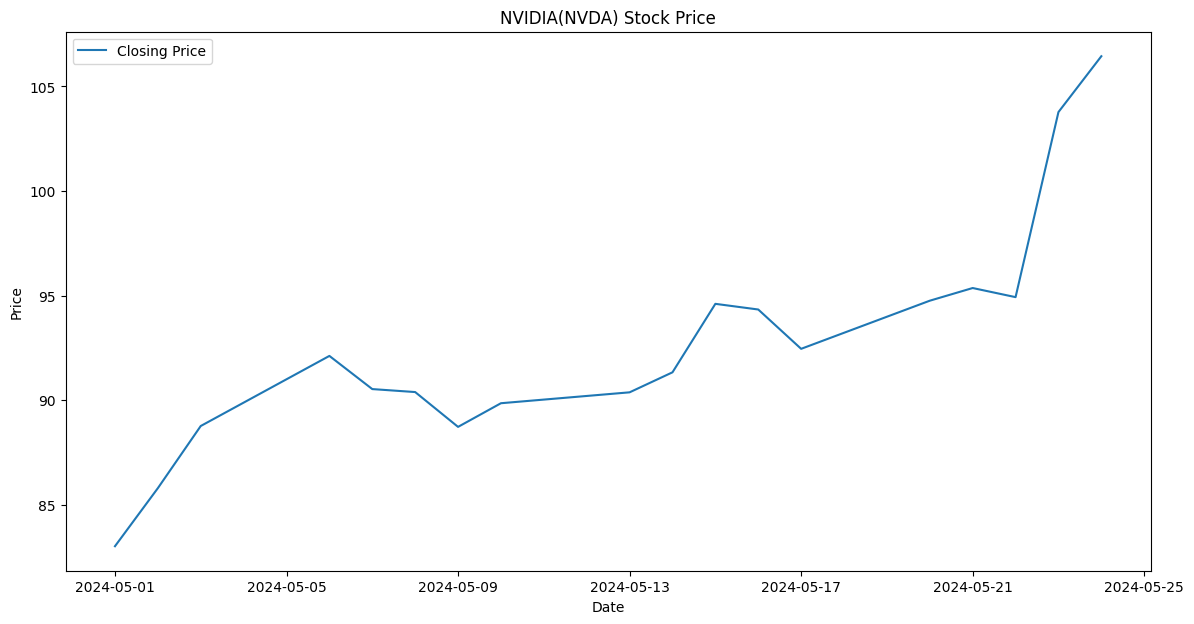

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('NVIDIA(NVDA) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [7]:
df.rename(columns={
    'Open': '시가',
    'High': '고가',
    'Low': '저가',
    'Close': '종가',
    'Adj Close': '수정 종가',
    'Volume': '거래량'
}, inplace=True)

df.rename_axis('날짜', inplace=True)

In [8]:
df.head()

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.021355,85.979654,81.235774,85.056876,559863000
2024-05-02,85.796700,86.216598,83.180314,84.429019,377898000
2024-05-03,88.767998,89.259878,87.019411,87.768234,398341000
2024-05-06,92.118202,92.198185,89.033933,89.368853,376203000
2024-05-07,90.532578,91.759285,88.989943,91.076448,437342000


In [9]:
from io import StringIO
csv_buffer = StringIO()
df.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.02135467529297,85.97965427425616,81.23577409191292,85.05687611412145,559863000
2024-05-02,85.79669952392578,86.21659833345969,83.18031423689433,84.42901930882867,377898000
2024-05-03,88.76799774169922,89.25987812120627,87.01941093195316,87.76823429941243,398341000
2024-05-06,92.11820220947266,92.19818511482366,89.0339329305278,89.36885276564674,376203000
2024-05-07,90.53257751464844,91.75928460609057,88.98994329110344,91.0764475332469,437342000
2024-05-08,90.39061737060547,91.17243008499568,89.39884761533344,89.46183625311598,325721000
2024-05-09,88.72601318359375,91.05046027533749,88.21013637581568,90.50758942585304,378013000
2024-05-10,89.85673522949219,91.37937754567422,89.20588826518858,90.2836361635132,335325000
2024-05-13,90.37762451171875,90.97648188381773,88.50806398354068,90.45660058201008,289680000
2024-05-14,91.33439636230469,91.62932476175912,88.91296448661012,89.5778081239568,296507000
2024-05-15,9

In [10]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model=os.getenv("OPENAI_DEFAULT_MODEL"),
  messages=[
    {
      "role": "system",
      "content": "다음은 엔비디아의 날짜별 주가 데이터야. 이 데이터를 분석해서 보고해줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

엔비디아(NVDA)의 2024년 5월 주가 데이터를 분석한 결과는 다음과 같습니다.

### 1. 주가 동향
- **시작가**: 2024년 5월 1일의 종가는 약 83.02달러로 시작했습니다.
- **최고가**: 5월 23일에 103.77달러로 최고가를 기록했습니다.
- **최저가**: 5월 1일에 81.24달러로 최저가를 기록했습니다.
- **종가**: 5월 24일의 종가는 106.44달러로, 한 달 동안 주가는 상승세를 보였습니다.

### 2. 주가 변화
- **변화폭**: 5월 1일부터 5월 24일까지의 종가는 약 23.42달러 상승했습니다 (83.02달러 → 106.44달러).
- **상승률**: 약 28.2%의 상승률을 기록했습니다.

### 3. 거래량
- **거래량**: 5월 23일에 835,065,000주로 가장 높은 거래량을 기록했습니다. 이는 주가 상승과 관련이 있을 수 있습니다.
- **거래량 추세**: 전체적으로 거래량은 5월 초반에 비해 후반으로 갈수록 증가하는 경향을 보였습니다.

### 4. 주요 일자
- **5월 15일**: 94.61달러로 큰 상승폭을 보였으며, 이는 주가 상승의 전환점이 될 수 있습니다.
- **5월 23일**: 주가가 103.77달러로 급등하며, 이 날의 거래량이 가장 많았습니다.

### 5. 결론
엔비디아의 2024년 5월 주가는 전반적으로 상승세를 보였으며, 특히 중순 이후 급격한 상승이 있었습니다. 거래량 또한 증가하며 투자자들의 관심이 높아진 것으로 보입니다. 이러한 추세는 향후 주가에 긍정적인 영향을 미칠 가능성이 있습니다. 

이 데이터는 향후 투자 결정을 위한 참고자료로 활용될 수 있습니다.
